In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits.mplot3d import Axes3D




In [8]:
def bifurcation_plot(f,f_x,r,x,rlabel='r'):
    """ produce a bifurcation diagram for a function f(r,x) given
        f and its partial derivative f_x(r,x) over a domain given by numpy arrays r and x
        
        f(r,x)  :  RHS function of autonomous ode dx/dt = f(r,x)
        f_x(r,x):  partial derivative of f with respect to x
        r       :  numpy array giving r coordinates of domain
        x       :  numpy array giving x coordinates of domain
        rlabel  :  string for x axis parameter label
    """
    # set up a mesh grid and extract the 0 level set of f
    R,X = np.meshgrid(r,x)
    plt.figure()
    CS = plt.contour(R,X,f(R,X),[0],colors='k')
    plt.clf()
    
    c0 = CS.collections[0]
    # for each path in the contour extract vertices and mask by the sign of df/dx
    for path in c0.get_paths():
        vertices = path.vertices
        vr = vertices[:,0]
        vx = vertices[:,1]
        mask = np.sign(f_x(vr,vx))
        stable = mask < 0.
        unstable = mask > 0.
        
        # plot the stable and unstable branches for each path
        plt.plot(vr[stable],vx[stable],'b')
        # plt.hold()
        plt.plot(vr[unstable],vx[unstable],'b--')
        
    plt.xlabel('parameter {0}'.format(rlabel))
    plt.ylabel('x')
    plt.legend(('stable','unstable'),loc='best')
    plt.xlim(r[0],r[-1])
    plt.ylim(x[0],x[-1])


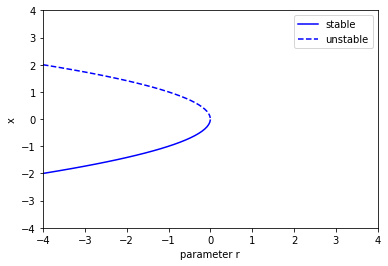

In [9]:
f = lambda r,x: r - x*x
f_x = lambda r,x: 2.*x

x = np.linspace(-4,4,100)
r = np.linspace(-4,4,100)

bifurcation_plot(f,f_x,r,x)

In [13]:
def lorenz(t, state, sigma, beta, rho):
    x, y, z = state
     
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
     
    return [dx, dy, dz]
 


Text(0.5, 0.92, 'solve_ivp')

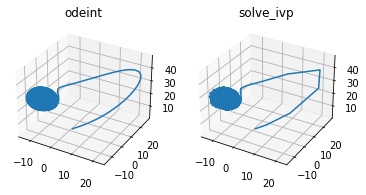

In [18]:
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0
 
p = (sigma, beta, rho)  # Parameters of the system
 
y0 = [1.0, 1.0, 1.0]  # Initial state of the system
t_span = (0.0, 40.0)
t = np.arange(0.0, 40.0, 0.01)
 
result_odeint = odeint(lorenz, y0, t, p, tfirst=True)
result_solve_ivp = solve_ivp(lorenz, t_span, y0, args=p)
 
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2])
ax.set_title("odeint")
 
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot(result_solve_ivp.y[0, :],
        result_solve_ivp.y[1, :],
        result_solve_ivp.y[2, :])
ax.set_title("solve_ivp")